In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.append('../../../')
import libs.data as data
import libs.rendering as rr
import seaborn as sns
from importlib import reload
plt.rcParams["figure.figsize"] = (10, 8) 

In [2]:
mlp_c3_ma1 = data.load('../tmp/results/mlp_cross_validate_5_class3_ma1')
mlp_c3_ma3 = data.load('../tmp/results/mlp_cross_validate_5_class3_ma3')
mlp_c2_ma1 = data.load('../tmp/results/mlp_cross_validate_5_class2_ma1')
mlp_c2_ma3 = data.load('../tmp/results/mlp_cross_validate_5_class2_ma3')
rf_c3_ma3 = data.load('../tmp/results/random_forests_cross_validate_5_class3_ma3')
logreg_c3_ma3 = data.load('../tmp/results/logistic_regression_cross_validate_5_class3_ma3')

In [3]:
columns = ['Name','Acc', 'Pre', 'Rec', 'F1', 'R', 'K', 'MAE']
data = [
    ['MLP'] + mlp_c3_ma3['apcf'] + [mlp_c3_ma3['r'], mlp_c3_ma3['k'], mlp_c3_ma3['mae']],
    ['LR'] + logreg_c3_ma3['apcf'] + [logreg_c3_ma3['r'], logreg_c3_ma3['k'], logreg_c3_ma3['mae']],
    ['RF'] + rf_c3_ma3['apcf'] + [rf_c3_ma3['r'], rf_c3_ma3['k'], rf_c3_ma3['mae']]
]

df_model_comp = pd.DataFrame(data, columns=columns)
df_model_comp.head()
df_model_comp.to_csv('../tmp/results/model_comparisons.csv',sep='~')

/home/che/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:1363: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


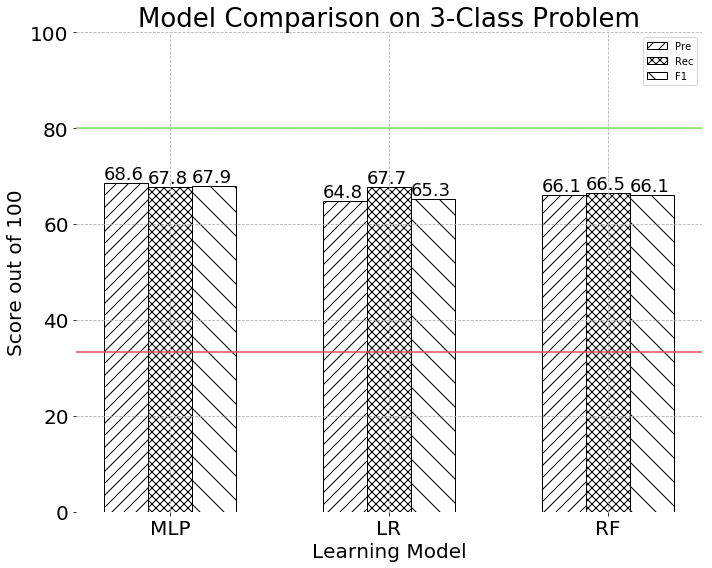

In [23]:
rr.render_accuracy_scores(df_model_comp, 
                          title={ 'title' : 'Model Comparison on 3-Class Problem', 'fontsize' : 26 },
                          ylim=100,
                          cols=['Pre', 'Rec', 'F1'],
                          xticks=df_model_comp['Name'].values,
                          axis_labels={ 'xlabel' : 'Learning Model', 'ylabel' : 'Score out of 100', 'fontsize' : 20 }, 
                          number_info={'fontsize':18, 'xoffset': -0.1, 'yoffset' : 0.8}, 
                          savefile='../renderings/model_comparison_for_class3_redo.png',
                          best_line=80.1, worst_line=33.3)

/home/che/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:1363: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


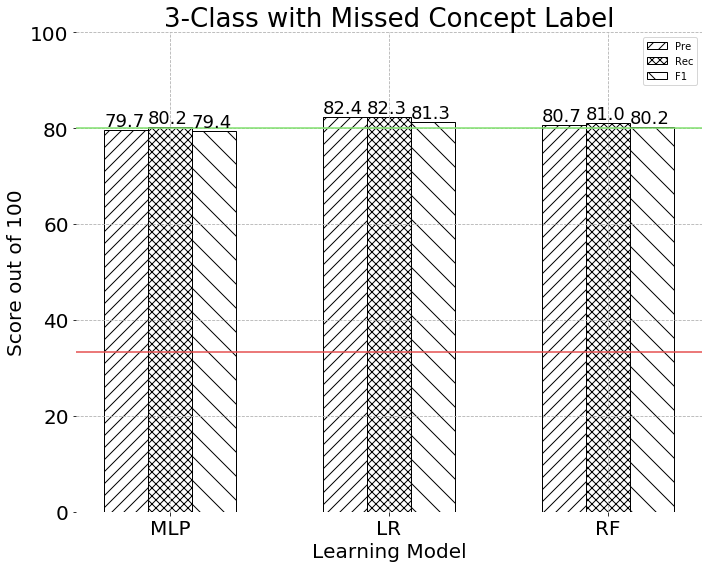

In [24]:
labels_mlp_c3_ma1 = data.load('../tmp/results/labels_mlp_cross_validate_5_class3_ma1')
labels_logreg_c3_ma1 = data.load('../tmp/results/labels_logreg_cross_validate_5_class3_ma1')
labels_rf_c3_ma1 = data.load('../tmp/results/labels_random_forest_cross_validate_5_class3_ma1')

labels_data = [
    ['MLP'] + labels_mlp_c3_ma1['apcf'] + [labels_mlp_c3_ma1['r'], labels_mlp_c3_ma1['k'], labels_mlp_c3_ma1['mae']],
    ['LR'] + labels_logreg_c3_ma1['apcf'] + [labels_logreg_c3_ma1['r'], labels_logreg_c3_ma1['k'], labels_logreg_c3_ma1['mae']],
    ['RF'] + labels_rf_c3_ma1['apcf'] + [labels_rf_c3_ma1['r'], labels_rf_c3_ma1['k'], labels_rf_c3_ma1['mae']]
]

df_model_comp_labels = pd.DataFrame(labels_data, columns=columns)
reload(rr)
rr.render_accuracy_scores(df_model_comp_labels, 
                          title={ 'title' : '3-Class with Missed Concept Label', 'fontsize' : 26 },
                          ylim=100,
                          cols=['Pre', 'Rec', 'F1'],
                          xticks=df_model_comp['Name'].values,
                          axis_labels={ 'xlabel' : 'Learning Model', 'ylabel' : 'Score out of 100', 'fontsize' : 20 }, 
                          number_info={'fontsize':18, 'xoffset': -0.1, 'yoffset' : 0.8}, 
                          savefile='../renderings/model_comparison_for_class3_redo_with_missed_concept.png',
                          best_line=80.1, worst_line=33.3)